In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
sns.set_theme(style="white")
import matplotlib as mpl


mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
# Set the default visibility of the spines
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['axes.spines.left'] = True

203


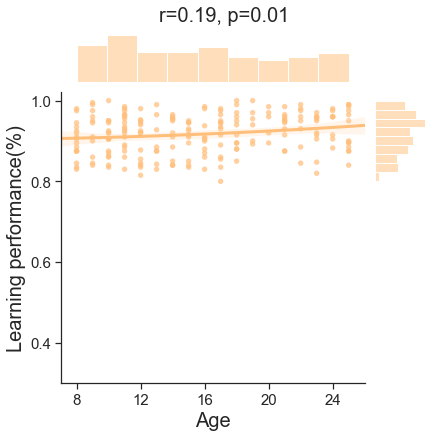

In [9]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]
print(len(data))
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
# correlation
res = pearsonr(data['Age'],data['training_acc'])
r = res[0]
p = res[1]

# plot
g = sns.jointplot(x="Age", y="training_acc", data=data,
                  kind="reg",truncate=False,
                  xlim=(7, 26), ylim=(0.3, 1.02),
                  color='#ffbe7a', height=6,order=2,
                  scatter_kws={'s':30,'alpha':0.7,'edgecolor':'None'},
                  line_kws={'linewidth':3},
                  marginal_kws=dict(kde=False,alpha=0.5))

#move overall title up
g.set_axis_labels('Age', 'Learning performance(%)',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r={}  p<0.001'.format(round(r,2)))
else:
    g.fig.suptitle('r={}, p={}'.format(round(r,2),round(p,2)),size=20)

# Remove the box lines of the axis
g.ax_joint.spines['top'].set_visible(False)
g.ax_joint.spines['right'].set_visible(False)
g.ax_joint.spines['bottom'].set_visible(True)
g.ax_joint.spines['left'].set_visible(True)

g.ax_marg_x.spines['top'].set_visible(False)
g.ax_marg_x.spines['right'].set_visible(False)
g.ax_marg_x.spines['bottom'].set_visible(False)
g.ax_marg_x.spines['left'].set_visible(False)

g.ax_marg_y.spines['top'].set_visible(False)
g.ax_marg_y.spines['right'].set_visible(False)
g.ax_marg_y.spines['bottom'].set_visible(False)
g.ax_marg_y.spines['left'].set_visible(False)

# Setting xticks
plt.yticks([0.4, 0.6, 0.8, 1.0],size=15)
plt.xticks([8, 12, 16, 20, 24],size=15)

# Add tick lines to the bottom and left spines
g.ax_joint.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
g.ax_joint.tick_params(axis='y', which='both', left=True, right=False, direction='out')

savepath = r'/mnt/workdir/DCM/Result/paper/figure1/age-training.pdf'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300,transparent=True)

## Age - Game1-2D Inference

203


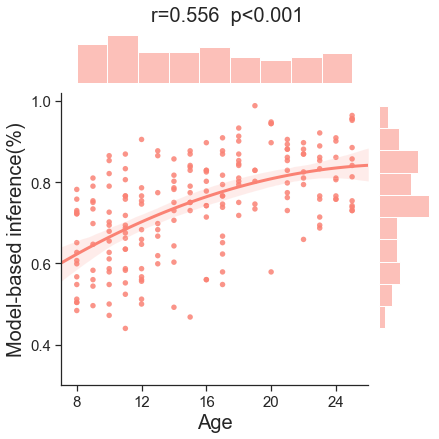

In [41]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]

print(len(data))
res = pearsonr(data['Age'],data['game1_acc'])
r = res[0]
p = res[1]
age_color = '#e36570'
# plot#FFCDB2
g = sns.jointplot(x="Age", y="game1_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 26), ylim=(0.3, 1.02),
                  color='#FA8274', height=6,order=2,
                  scatter_kws={'s':30,'alpha':0.85,'edgecolor':'None'},
                  line_kws={'linewidth':3},
                  marginal_kws=dict(kde=False,alpha=0.5))

#move overall title up
g.set_axis_labels('Age', 'Model-based inference(%)',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r={}  p<0.001'.format(round(r,3)),size=20)
else:
    g.fig.suptitle('r={}, p:{}'.format(round(r,3),round(p,3)),size=20)

# Remove the box lines of the axis
g.ax_joint.spines['top'].set_visible(False)
g.ax_joint.spines['right'].set_visible(False)
g.ax_joint.spines['bottom'].set_visible(True)
g.ax_joint.spines['left'].set_visible(True)

g.ax_marg_x.spines['top'].set_visible(False)
g.ax_marg_x.spines['right'].set_visible(False)
g.ax_marg_x.spines['bottom'].set_visible(False)
g.ax_marg_x.spines['left'].set_visible(False)

g.ax_marg_y.spines['top'].set_visible(False)
g.ax_marg_y.spines['right'].set_visible(False)
g.ax_marg_y.spines['bottom'].set_visible(False)
g.ax_marg_y.spines['left'].set_visible(False)
# Setting xticks
plt.yticks([0.4, 0.6, 0.8, 1.0],size=15)
plt.xticks([8, 12, 16, 20, 24],size=15)

# Add tick lines to the bottom and left spines
g.ax_joint.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
g.ax_joint.tick_params(axis='y', which='both', left=True, right=False, direction='out')
savepath = r'/mnt/workdir/DCM/Result/paper/figure1/age-2Dgame1.pdf'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300,transparent=True)

## Age - Game2-2D Inference

193


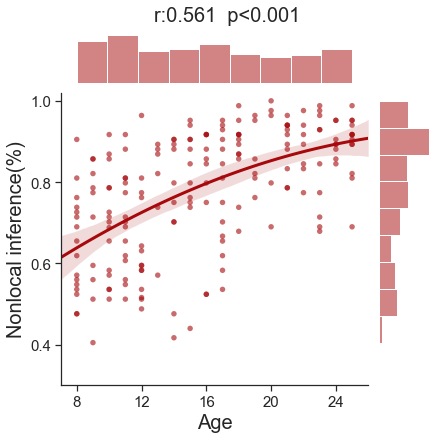

In [48]:
#age-game2
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data.query('game2_fmri>=0.5')

print(len(data))
# cal correlation
res = pearsonr(data['Age'],data['game2_test_acc'])
r = res[0]
p = res[1]
# plot
g = sns.jointplot(x="Age", y="game2_test_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 26), ylim=(0.3, 1.02),
                  color='#A6080B', height=6,order=2,
                  scatter_kws={'s':30,'alpha':0.6,'edgecolor':'None'},
                  line_kws={'linewidth':3},marginal_kws=dict(kde=False,alpha=0.5))

#move overall title up
g.set_axis_labels('Age', 'Nonlocal inference(%)',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)),size=20)
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)),size=20)

# Remove the box lines of the axis
g.ax_joint.spines['top'].set_visible(False)
g.ax_joint.spines['right'].set_visible(False)
g.ax_joint.spines['bottom'].set_visible(True)
g.ax_joint.spines['left'].set_visible(True)

g.ax_marg_x.spines['top'].set_visible(False)
g.ax_marg_x.spines['right'].set_visible(False)
g.ax_marg_x.spines['bottom'].set_visible(False)
g.ax_marg_x.spines['left'].set_visible(False)

g.ax_marg_y.spines['top'].set_visible(False)
g.ax_marg_y.spines['right'].set_visible(False)
g.ax_marg_y.spines['bottom'].set_visible(False)
g.ax_marg_y.spines['left'].set_visible(False)
# Setting xticks
plt.yticks([0.4, 0.6, 0.8, 1.0],size=15)
plt.xticks([8, 12, 16, 20, 24],size=15)
# Add tick lines to the bottom and left spines
g.ax_joint.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
g.ax_joint.tick_params(axis='y', which='both', left=True, right=False, direction='out')
savepath = r'/mnt/workdir/DCM/Result/paper/figure1/age-2Dgame2.pdf'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300,transparent=True)

## Game difference

Subject number 193
Difference in accuracy for two games: r: 0.241 p: 0.001
70
Age group: Children, t: 0.5308738133210319, p: 0.59721089
51
Age group: Adolescents, t: 4.2394501845476285, p: 9.642e-05
72
Age group: Adults, t: 6.502002777284011, p: 1e-08


([<matplotlib.axis.XTick at 0x7f4f01314520>,
 [Text(-0.5, 0, ''),
  Text(0.0, 0, 'Children'),
  Text(1.0, 0, 'Adolescents'),
  Text(2.0, 0, 'Adults')])

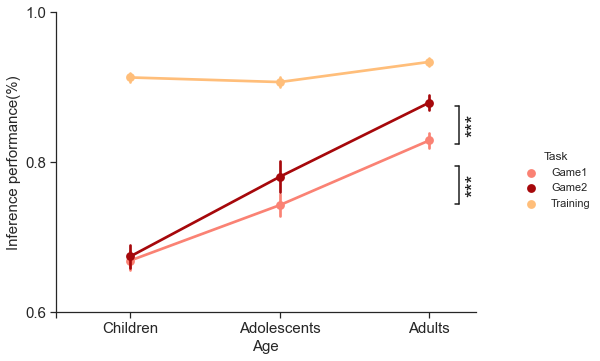

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind,ttest_rel

def add_significance_markers(ax, x, y):
    ax.text(x, y, '***', ha='center', va='center', color='k', fontsize=20, rotation=90)
    ax.plot([x-0.1, x-0.1], [y-0.025, y+0.025], color='k', linestyle='-')
    ax.plot([x-0.125, x-0.1], [y-0.025, y-0.025], color='k', linestyle='-')
    ax.plot([x-0.125, x-0.1], [y+0.025, y+0.025], color='k', linestyle='-')


beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(beha_total_score, sep='\t')
data['training_acc'] = (data['train_ap'] + data['train_dp']) / 2
data['Game1'] = data['game1_acc']
data['Game2'] = data['game2_test_acc']
data['Training'] = data['training_acc']

data = data[data['game2_fmri'] >= 0.5]

# Add age group categories
age_bins = [7, 12, 17, 25]
age_labels = ['Children', 'Adolescents', 'Adults']
data['age_group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

data['game_diff'] = data['Game2'] - data['Game1'] 
r, p = pearsonr(data['Age'],data['game_diff'])
print("Subject number",len(data))
print('Difference in accuracy for two games:','r:',round(r,3),'p:',round(p,3))
# Melt the data for easier plotting
data_melted = data.melt(id_vars=['age_group'], value_vars=['Game1', 'Game2','Training'],
                        var_name='Task', value_name='accuracy')
'#ffbe7a''#A6080B'
# Plot the data#AB090B
colors = ['#FA8274','#A6080B','#ffbe7a']
g = sns.catplot(x='age_group', y='accuracy', hue='Task', data=data_melted, kind='point', errorbar="se",palette=colors,legend=True)
g.set_axis_labels("Age", "Inference performance(%)",size=15)
g._legend.set_title('Task')
#g._legend.set_bbox_to_anchor((0.3, 0.9)) #4Adjust these values to position the legend closer to the figure
g.fig.set_size_inches(9,5)

# compare accuracy between game1 and game2 for each age groups using t-tests
for index,age_group in enumerate(age_labels):
    game1 = data_melted[(data_melted['age_group'] == age_group) & (data_melted['Task'] == 'Game1')]['accuracy']
    game2 = data_melted[(data_melted['age_group'] == age_group) & (data_melted['Task'] == 'Game2')]['accuracy']
    t, p = ttest_rel(game2, game1)
    print(len(game1))
    print('Age group: {}, t: {}, p: {}'.format(age_group, t, round(p,8)))

# add significance stars, horizontal lines, vertical lines to the plot for each age group
add_significance_markers(g.ax,2.3,0.77)
add_significance_markers(g.ax,2.3,0.85)

# Setting xticks40
g.ax.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
g.ax.tick_params(axis='y', which='both', left=True, right=False, direction='out')
plt.xticks(size=15)
plt.yticks([0.6, 0.8, 1.0],size=15)
plt.xticks([-0.5, 0, 1.0,2],['','Children','Adolescents','Adults'],size=15)
# savepath = r'/mnt/workdir/DCM/Result/paper/figure1/age-game-difference_beauty.pdf'
#g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300,transparent=True)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind,ttest_rel

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(beha_total_score, sep='\t')
data['training_acc'] = (data['train_ap'] + data['train_dp']) / 2
data['Game1'] = data['game1_acc']
data['Game2'] = data['game2_test_acc']
data['Training'] = data['training_acc']

data = data[data['game2_fmri'] >= 0.5]

# Add age group categories
age_bins = [7, 12, 17, 25]
age_labels = ['Children', 'Adolescents', 'Adults']
data['age_group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

# Melt the data for easier plotting
data_melted = data.melt(id_vars=['age_group'], value_vars=['Game1', 'Game2','Training'],
                        var_name='Task', value_name='accuracy')
'#ffbe7a''#A6080B'
# Plot the data#AB090B
colors = ['#FA8274','#A6080B','#ffbe7a']
g = sns.catplot(x='age_group', y='accuracy', hue='Task', data=data_melted, kind='point', errorbar="se",palette=colors,legend=True)
g.set_axis_labels("Age", "Inference performance(%)",size=15)
g._legend.set_title('Task')
#g._legend.set_bbox_to_anchor((0.3, 0.9)) #4Adjust these values to position the legend closer to the figure
g.fig.set_size_inches(9,5)

# compare accuracy between game1 and game2 for each age groups using t-tests
for index,age_group in enumerate(age_labels):
    game1 = data_melted[(data_melted['age_group'] == age_group) & (data_melted['Task'] == 'Game1')]['accuracy']
    game2 = data_melted[(data_melted['age_group'] == age_group) & (data_melted['Task'] == 'Game2')]['accuracy']
    t, p = ttest_rel(game2, game1)
    print('Age group: {}, t: {}, p: {}'.format(age_group, t, round(p,8)))
    # add significance stars to the plot for each age group
    y_position = (game1.mean() + game2.mean())/2
    if p <= 0.001:
        g.ax.text(1.2, y_position, '***', ha='center', va='center', color='k', fontsize=20, rotation=90)
        #g.ax.plot([1.2, 2.35], [y_position-0.035,y_position+0.035], color='k', linestyle='-')
    elif p <= 0.01:
        g.ax.text(2.3, y_position, '**', ha='center', va='center', color='k', fontsize=20, rotation=90)
    elif p <= 0.05:
        g.ax.text(2.3, y_position, '*', ha='center', va='center', color='k', fontsize=20, rotation=90)

# Setting xticks40
g.ax.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
g.ax.tick_params(axis='y', which='both', left=True, right=False, direction='out')
plt.xticks(size=15)
plt.yticks([0.6, 0.8, 1.0],size=15)
plt.xticks([-0.5, 0, 1.0,2],['','Children','Adolescents','Adults'],size=15)
savepath = r'/mnt/workdir/DCM/Result/paper/figure1/age-game-difference_new.pdf'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300,transparent=True)